In [1]:
csv_path ="../data/raw/csvs/cut1_full.csv"

In [2]:
import pandas as pd
import pickle
# from db import DBHandler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dtypes = {
    'user.id_str': str,
    'id_str': str,
    'retweeted_status.id_str': str ,
    'retweeted_status.user.id_str': str,
    'retweet_count': int,
    'quoted_status_id_str': str,
}
df = pd.read_csv(csv_path, dtype=dtypes, encoding='utf-8')

# parse dates
datetime_cols = [c for c in df.columns if 'created_at' in c]
for c in datetime_cols:
    df[c] = pd.to_datetime(df[c])

# reemplazar nombre de columnas: . por __ para sintactic sugar de pandas.
df.rename(columns=lambda x: x.replace('.', '__'), inplace=True)

### Actividad medida por sólo retweets para los usuarios de prueba

In [4]:
test_users_path = '../data/processed/active_and_central_ONLY_RT.pickle'
with open(test_users_path, 'rb') as f:
    ac_users_rt = pickle.load(f)
ac_users_rt = [int(x) for x in ac_users_rt]
print("Cantidad de active and central users: {}".format(len(ac_users_rt)))

Cantidad de active and central users: 224


Promedio de cantidad de datos: 2385.0758928571427


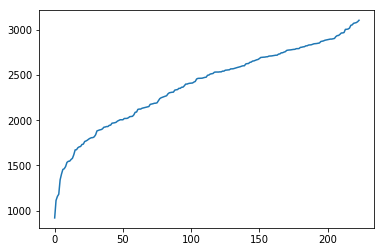

In [5]:
aux = df.user__id_str.groupby(df.user__id_str).count()
values = aux[ac_users_rt].values
values.sort()
x_s = range(len(values))
y_s = values
plt.plot(x_s, y_s)

avg = sum(values) * 1.0 / len(values)
print('Promedio de cantidad de datos: {}'.format(avg))

### Actividad medida por tweets originales para los usuarios de prueba

In [6]:
test_users_path = '../data/processed/active_and_central_T_AND_RT.pickle'
with open(test_users_path, 'rb') as f:
    ac_users = pickle.load(f)
ac_users = [int(x) for x in ac_users]
print("Cantidad de active and central users: {}".format(len(ac_users)))

Cantidad de active and central users: 179


Promedio de cantidad de datos: 3108.1284916201116


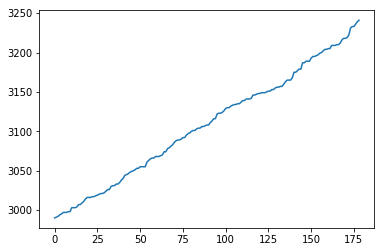

In [7]:
aux = df.user__id_str.groupby(df.user__id_str).count()
values = aux[ac_users].values
values.sort()
x_s = range(len(values))
y_s = values
plt.plot(x_s, y_s)

avg = sum(values) * 1.0 / len(values)
print('Promedio de cantidad de datos: {}'.format(avg))

#### Interseccion de ambos métodos:

In [8]:
w_original_tweets = set(ac_users)
w_retweets = set(ac_users_rt)
inters = w_original_tweets.intersection(w_retweets)
len(inters)

11

## Relacion con trabajo previo (Pablo)

In [9]:
from sqlalchemy.orm import sessionmaker                                                                                                                                
from sqlalchemy import create_engine
from dbmodels import *

connection = 'sqlite:///../data/processed/twitter_sample.db'
engine = create_engine(connection)
Session = sessionmaker(bind=engine)
s = Session()

rtcounts = {u: len(u.retweets) for u in s.query(User).all()}

SQLITE_CONNECTION = None
CSV_RAW = None
CSV_CUTTED = None
JSON_TEXTS = None


In [10]:
rtcounts_ids = {u.id: count for u, count in rtcounts.items()}

In [11]:
pablo_users_path = '../data/processed/active_and_central_PABLO.pickle'
with open(pablo_users_path, 'rb') as f:
    ac_users_pablo = pickle.load(f)
ac_users_pablo = [int(x) for x in ac_users_pablo]
print("Cantidad de active and central users: {}".format(len(ac_users_pablo)))

Cantidad de active and central users: 204


Promedio de cantidad de datos: 360.80882352941177


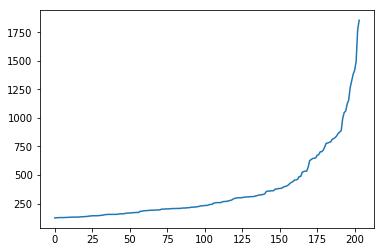

In [12]:
values = [rtcounts_ids[u] for u in ac_users_pablo]
values.sort()
x_s = range(len(values))
y_s = values
plt.plot(x_s, y_s)

avg = sum(values) * 1.0 / len(values)
print('Promedio de cantidad de datos: {}'.format(avg))

### Interseccion con trabajo de pablo
###### Seleccion de usuarios por actividad en RT solamente

In [13]:
w_retweets = set(ac_users_rt)
pablo_users = set(ac_users_pablo)
inters = pablo_users.intersection(w_retweets)
len(inters)

22

In [14]:
w_original_tweets = set(ac_users)
pablo_users = set(ac_users_pablo)
inters = pablo_users.intersection(w_original_tweets)
len(inters)

5